<a href="https://colab.research.google.com/github/UrsulaM25/ProyectoDSIIParteI_Macedo/blob/main/ProyectoDSIIParteI_Macedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción

Analizar la oferta y demanda de energía eléctrica a lo largo del tiempo no solo
permite detectar tendencias y estacionalidades,sino que también permite comprender como se despacha la energía en diferentes contextos. Esta información resulta clave a la hora de tomar decisiones para gestionar la demanda y oferta de manera eficiente, prever picos de consumo y planificar en consecuencia reduciendo riesgos de desabastecimiento y optimizando los recursos disponibles.

Por ello, en base a la variabilidad, disponibilidad de fuentes de energía y la demanda de la población, la empresa busca predecir con antelación si será necesario importar energía de paises vecinos y en que magnitud, para gestionar las  compras minimizando los costos y riesgos.


#2. Dataset

Se seleccionó un dataframe que contiene datos de oferta y demanda de energía eléctrica en Argentina desde el año 2022 a 2024, los mismos provienen de la página de CAMMESA (organismo encargado de operar el mercado eléctrico mayorista en Argentina).

Sus columnas contienen los siguientes datos:

Año: año de demanda

mes: mes de demanda, formato mes-año

n° mes

n° día

Tipo de día: hábil, no hábil

día: Dia de la semana

fecha: formato día/mes/año

hora

Nuclear           (MWh): Datos de generación nuclear en MWh

Biogas            (MWh): Datos de generación por Biogas en MWh

Biomasa           (MWh): Datos de generación por Biomasa en MWh

Eólica            (MWh): Datos de generación eólica en MWh

Hidráulica > 50   (MWh): Datos de generación hidroelectrica mayor a 50 MW en MWh

Hidráulica < 50   (MWh): Datos de generación hidroelectrica menor a 50 MW en MWh

Solar             (MWh): Datos de generación solar en MWh

Ciclos Combinados (MWh): Datos de generación de CC en MWh

Motor Diesel      (MWh): Datos de generación Motor Diesel en MWh

Turbina a gas     (MWh): Datos de generación TG en MWh

Turbovapor        (MWh): Datos de generación TV en MWh

Importación       (MWh): Datos energía importada

GENERACION TOTAL  (MWh): Suma de MWh de fuentes de generación

Gran Usuario MEM  (MWh): Demanda de grandes usuarios en MWh, la misma está compuesta por la demanda de la categoría GUMA (Gran Usuario Mayorista Autogenerador) como ejemplo se pueden mencionar las demandas de las empresas Arcor, Acindar, aysa, molinos cañuelas entre otras.

DISTRIBUIDOR (demanda estacional+GUMEs)  (MWh): La categoría distribuidor comprende la demanda en MWh de la demanda estacional y las GUMEs (Grandes Usuarios Menores) como ejemplo se pueden mencionar cooperativas, Edelap, Edenor, Edesur, EPEC entre otros.

DEMANDA LOCAL [MWh]:  La demanda local es la suma de las demandas Gran Usuario MEM y Distribuidor (demanda estacional+GUMEs)







# 3. Definición de Hipótesis

Las hipótesis planteadas son las siguientes:

1. Para una demanda local, dado un dia y hora la combinación de fuentes de generación no es aleatoria, sigue un patron en base a la disponibilidad de las mismas y sus costos.


2. Para un dia, se pueden detectar fuentes de generación base a lo largo de las horas (por ejemplo nuclear) y fuentes de generación de pico que generan energía en horas pico de consumo (por ejemplo térmicas).

3. La demanda es altamente horaria.

4.  Cuando hay falta de oferta se utiliza la importación generalmente en horas pico

# 4. Importar Librerias

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Libreria para visualizacion datos nulos
import missingno as msno

#Libreria de Scikit-learn para imputacion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split


#Libreria visualización interactiva
from matplotlib.animation import FuncAnimation
import plotly.express as px
import plotly.graph_objects as go


#Libreria para eliminar warnings
import warnings
warnings.filterwarnings('ignore')

#Configuraciones adicionales
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


# 5. Carga de datos

In [2]:
df = pd.read_csv ("https://raw.githubusercontent.com/UrsulaM25/ProyectoDSIIParteI_Macedo/refs/heads/main/Demanda_Oferta_horaria_CSV.csv", delimiter=";",decimal=",")  # Especifico el delimitador y agrego el CSV

In [3]:
df.shape #tamaño de dataframe

(26304, 24)

In [4]:
df.size #Cantidad de datos

631296

# 6. Data wrangling

In [5]:
df.info () #Info df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   AÑO                                             26304 non-null  int64  
 1   MES                                             26304 non-null  object 
 2   N° MES                                          26304 non-null  int64  
 3   N° DIA                                          26304 non-null  int64  
 4   TIPO DIA                                        26304 non-null  object 
 5   DIA                                             26304 non-null  object 
 6   FECHA                                           26304 non-null  object 
 7   HORA                                            26304 non-null  int64  
 8   Nuclear (MWh)                                   26304 non-null  float64
 9   Biogas (MWh)                           

In [6]:
df.describe () #Info df

,AÑO,N° MES,N° DIA,HORA,Nuclear (MWh),Biogas (MWh),Biomasa (MWh),Eólica (MWh),Hidráulica > 50 (MWh),Hidráulica < 50 (MWh),Solar (MWh),Ciclos Combinados (MWh),Motor Diesel (MWh),Turbina a gas (MWh),Turbovapor (MWh),Importación (MWh),GENERACION TOTAL [MWh],Gran Usuario MEM (MWh),DISTRIBUIDOR (demanda estacional+GUMEs) (MWh),DEMANDA LOCAL [MWh]
count,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2023.000912,6.521898,15.732664,12.500000,1021.943081,51.902085,85.485689,1703.329923,3913.556156,142.772102,385.077138,7211.325614,226.443749,760.610127,551.589460,654.061771,16708.096896,2115.297939,13847.224415,15962.522354
std,0.816698,3.449052,8.801537,6.922318,399.316061,6.298146,19.194047,631.504332,1534.178073,54.508154,463.268274,1484.758080,221.050342,552.909763,429.179705,726.896354,2941.348364,195.718895,2824.949398,2870.258213
min,2022.000000,1.000000,1.000000,1.000000,0.000000,15.589000,20.694000,112.518000,1034.723000,44.258000,0.000000,3177.443000,23.064000,68.258000,0.000000,0.000000,10059.670000,1203.000000,7735.000000,9282.000000
25%,2022.000000,4.000000,8.000000,6.750000,924.535750,47.035000,76.388000,1247.775750,2680.828750,91.698250,0.000000,6082.460000,61.382000,395.139750,189.619250,14.950000,14568.505750,1992.000000,11823.000000,13885.000000
50%,2023.000000,7.000000,16.000000,12.500000,944.499000,51.518000,84.183500,1708.017000,3701.931000,142.853500,18.343500,7163.403500,130.693500,579.764000,480.811500,311.705000,16342.899000,2143.000000,13475.000000,15617.500000
75%,2024.000000,10.000000,23.000000,18.250000,1323.467750,57.493250,99.434000,2175.820000,5062.347250,182.439500,832.051000,8349.911000,356.447250,1005.561250,853.461500,1264.622500,18512.595500,2251.000000,15590.000000,17729.000000
max,2024.000000,12.000000,31.000000,24.000000,1611.693000,65.650000,133.561000,3470.656000,8493.314000,291.537000,1609.526000,11560.524000,1379.237000,3773.587000,2139.857000,3328.290000,28689.406000,2698.000000,25422.000000,27433.000000


## 6.1 Formatos (df_base1)

Se verifican formatos y/o aplicar cambios al df  original

In [7]:
df

,AÑO,MES,N° MES,N° DIA,TIPO DIA,DIA,FECHA,HORA,Nuclear (MWh),Biogas (MWh),Biomasa (MWh),Eólica (MWh),Hidráulica > 50 (MWh),Hidráulica < 50 (MWh),Solar (MWh),Ciclos Combinados (MWh),Motor Diesel (MWh),Turbina a gas (MWh),Turbovapor (MWh),Importación (MWh),GENERACION TOTAL [MWh],Gran Usuario MEM (MWh),DISTRIBUIDOR (demanda estacional+GUMEs) (MWh),DEMANDA LOCAL [MWh]
0,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,1,1357.060,48.098,67.429,1649.507,1678.081,110.497,0.000,8884.915,264.439,1215.024,1100.361,278.204,16653.615,1266,14628,15894
1,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,2,1360.842,47.729,50.870,1529.287,1744.359,111.797,0.000,9269.344,238.832,1123.293,1100.440,232.120,16808.913,1264,14703,15967
2,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,3,1359.371,47.745,45.193,1490.881,1570.168,110.453,0.000,9711.728,237.449,1113.151,1091.554,222.778,17000.471,1296,14950,16246
3,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,4,1357.517,46.755,45.664,1848.192,1558.943,110.664,0.000,9598.543,235.638,1120.335,1089.965,276.418,17288.634,1295,15020,16315
4,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,5,1358.948,46.883,46.031,2270.724,1574.759,111.008,0.000,9040.523,238.270,1044.805,1093.251,291.968,17117.170,1291,14814,16105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2024,dic-24,12,31,Hábil,Martes,31/12/2024,20,1139.181,54.986,86.832,2259.766,4226.993,153.553,288.373,8792.182,172.199,761.922,373.344,0.028,18309.359,1413,16162,17575
26300,2024,dic-24,12,31,Hábil,Martes,31/12/2024,21,1139.984,55.428,82.761,2255.846,4528.189,170.953,20.168,8982.498,176.392,899.281,322.530,0.028,18634.058,1399,16482,17881
26301,2024,dic-24,12,31,Hábil,Martes,31/12/2024,22,1140.962,55.535,83.628,1972.647,4107.739,165.030,0.000,9045.500,181.909,883.725,312.528,0.022,17949.225,1381,15993,17374
26302,2024,dic-24,12,31,Hábil,Martes,31/12/2024,23,1139.501,55.642,81.527,1935.492,3314.324,176.739,0.000,8737.521,130.123,549.258,215.099,0.022,16335.248,1366,14496,15862


In [8]:
df_base1=df.copy()

Se cambian los nombres de las columnas para facilitar el análisis sobre df_base

In [9]:
#Normalizo formatos
df_base1['TIPO DIA'] = df_base1['TIPO DIA'].replace({'No hábil':'No Hábil'})

# Renombrar columnas
df_base1 = df_base1.rename(columns={'DISTRIBUIDOR (demanda estacional+GUMEs)  (MWh)':'DISTRIBUIDOR', 'DEMANDA LOCAL [MWh]': 'DEMANDALOCAL', 'N° MES':'NUMMES','N° DIA':'NUMDIA','TIPO DIA':'TIPODIA','Nuclear (MWh)':'NUCLEAR','Biogas (MWh)': 'BIOGAS', 'Biomasa (MWh)': 'BIOMASA', 'Eólica (MWh)':'EOLICA','Hidráulica > 50  (MWh)':'HIDRO_MAS_50','Hidráulica < 50 (MWh)':'HIDRO_MENOS_50','Solar (MWh)':'SOLAR','Ciclos Combinados (MWh)':'CC','Motor Diesel (MWh)':'MDIESEL','Turbina a gas (MWh)':'TG','Turbovapor (MWh)':'TV','Importación (MWh)':'IMPORTACION','GENERACION TOTAL [MWh]':'GENERACIONTOTAL','Gran Usuario MEM  (MWh)':'GRANUSUARIO'
             })


In [10]:
print(df_base1.dtypes) #Verificar tipo de datos

AÑO                  int64
MES                 object
NUMMES               int64
NUMDIA               int64
TIPODIA             object
DIA                 object
FECHA               object
HORA                 int64
NUCLEAR            float64
BIOGAS             float64
BIOMASA            float64
EOLICA             float64
HIDRO_MAS_50       float64
HIDRO_MENOS_50     float64
SOLAR              float64
CC                 float64
MDIESEL            float64
TG                 float64
TV                 float64
IMPORTACION        float64
GENERACIONTOTAL    float64
GRANUSUARIO          int64
DISTRIBUIDOR         int64
DEMANDALOCAL         int64
dtype: object


Se cambia  el formato fecha y enteros

In [11]:
df_base1["FECHA"] = pd.to_datetime(df_base1["FECHA"], format="%d/%m/%Y") #Cambiar tipo de dato de fecha a fecha

df_base1.dtypes['FECHA']


dtype('<M8[ns]')

In [12]:
columnas_a_convertir=['GRANUSUARIO','DISTRIBUIDOR','DEMANDALOCAL']

df_base1[columnas_a_convertir] = df_base1[columnas_a_convertir].astype(float) #convertir columnas a float

In [13]:
print(df_base1.dtypes)  # Verificar el tipo de datos

AÑO                         int64
MES                        object
NUMMES                      int64
NUMDIA                      int64
TIPODIA                    object
DIA                        object
FECHA              datetime64[ns]
HORA                        int64
NUCLEAR                   float64
BIOGAS                    float64
BIOMASA                   float64
EOLICA                    float64
HIDRO_MAS_50              float64
HIDRO_MENOS_50            float64
SOLAR                     float64
CC                        float64
MDIESEL                   float64
TG                        float64
TV                        float64
IMPORTACION               float64
GENERACIONTOTAL           float64
GRANUSUARIO               float64
DISTRIBUIDOR              float64
DEMANDALOCAL              float64
dtype: object


## 6.2 Eliminar columnas (df_base)

In [14]:
df_base=df_base1.copy()

In [15]:
df_base.head()

,AÑO,MES,NUMMES,NUMDIA,TIPODIA,DIA,FECHA,HORA,NUCLEAR,BIOGAS,BIOMASA,EOLICA,HIDRO_MAS_50,HIDRO_MENOS_50,SOLAR,CC,MDIESEL,TG,TV,IMPORTACION,GENERACIONTOTAL,GRANUSUARIO,DISTRIBUIDOR,DEMANDALOCAL
0,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,1,1357.060,48.098,67.429,1649.507,1678.081,110.497,0.0,8884.915,264.439,1215.024,1100.361,278.204,16653.615,1266.0,14628.0,15894.0
1,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,2,1360.842,47.729,50.870,1529.287,1744.359,111.797,0.0,9269.344,238.832,1123.293,1100.440,232.120,16808.913,1264.0,14703.0,15967.0
2,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,3,1359.371,47.745,45.193,1490.881,1570.168,110.453,0.0,9711.728,237.449,1113.151,1091.554,222.778,17000.471,1296.0,14950.0,16246.0
3,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,4,1357.517,46.755,45.664,1848.192,1558.943,110.664,0.0,9598.543,235.638,1120.335,1089.965,276.418,17288.634,1295.0,15020.0,16315.0
4,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,5,1358.948,46.883,46.031,2270.724,1574.759,111.008,0.0,9040.523,238.270,1044.805,1093.251,291.968,17117.170,1291.0,14814.0,16105.0


In [16]:
# Eliminar una columna
# axis=1 indica que queremos eliminar una columna (axis=0 sería una fila)
df_base= df_base.drop(['MES','NUMDIA','NUMMES','DIA','GRANUSUARIO','DISTRIBUIDOR'], axis=1)

In [17]:
df_base.head()

,AÑO,TIPODIA,FECHA,HORA,NUCLEAR,BIOGAS,BIOMASA,EOLICA,HIDRO_MAS_50,HIDRO_MENOS_50,SOLAR,CC,MDIESEL,TG,TV,IMPORTACION,GENERACIONTOTAL,DEMANDALOCAL
0,2022,No Hábil,2022-01-01,1,1357.060,48.098,67.429,1649.507,1678.081,110.497,0.0,8884.915,264.439,1215.024,1100.361,278.204,16653.615,15894.0
1,2022,No Hábil,2022-01-01,2,1360.842,47.729,50.870,1529.287,1744.359,111.797,0.0,9269.344,238.832,1123.293,1100.440,232.120,16808.913,15967.0
2,2022,No Hábil,2022-01-01,3,1359.371,47.745,45.193,1490.881,1570.168,110.453,0.0,9711.728,237.449,1113.151,1091.554,222.778,17000.471,16246.0
3,2022,No Hábil,2022-01-01,4,1357.517,46.755,45.664,1848.192,1558.943,110.664,0.0,9598.543,235.638,1120.335,1089.965,276.418,17288.634,16315.0
4,2022,No Hábil,2022-01-01,5,1358.948,46.883,46.031,2270.724,1574.759,111.008,0.0,9040.523,238.270,1044.805,1093.251,291.968,17117.170,16105.0


## 6.3 Verificar Valores faltantes

In [18]:
print("Valores Nulos por Columna:") #Se verifican los valores nulos
df_base.isnull().sum()

Valores Nulos por Columna:


,0
AÑO,0
TIPODIA,0
FECHA,0
HORA,0
NUCLEAR,0
BIOGAS,0
BIOMASA,0
EOLICA,0
HIDRO_MAS_50,0
HIDRO_MENOS_50,0


El df_base no tiene valores NaN

# 7. Análisis Exploratorio de Datos: EDA (df_base)

In [19]:
df_base.duplicated().sum()

np.int64(0)

No hay valores duplicados

## 7.1 Verificar outliers

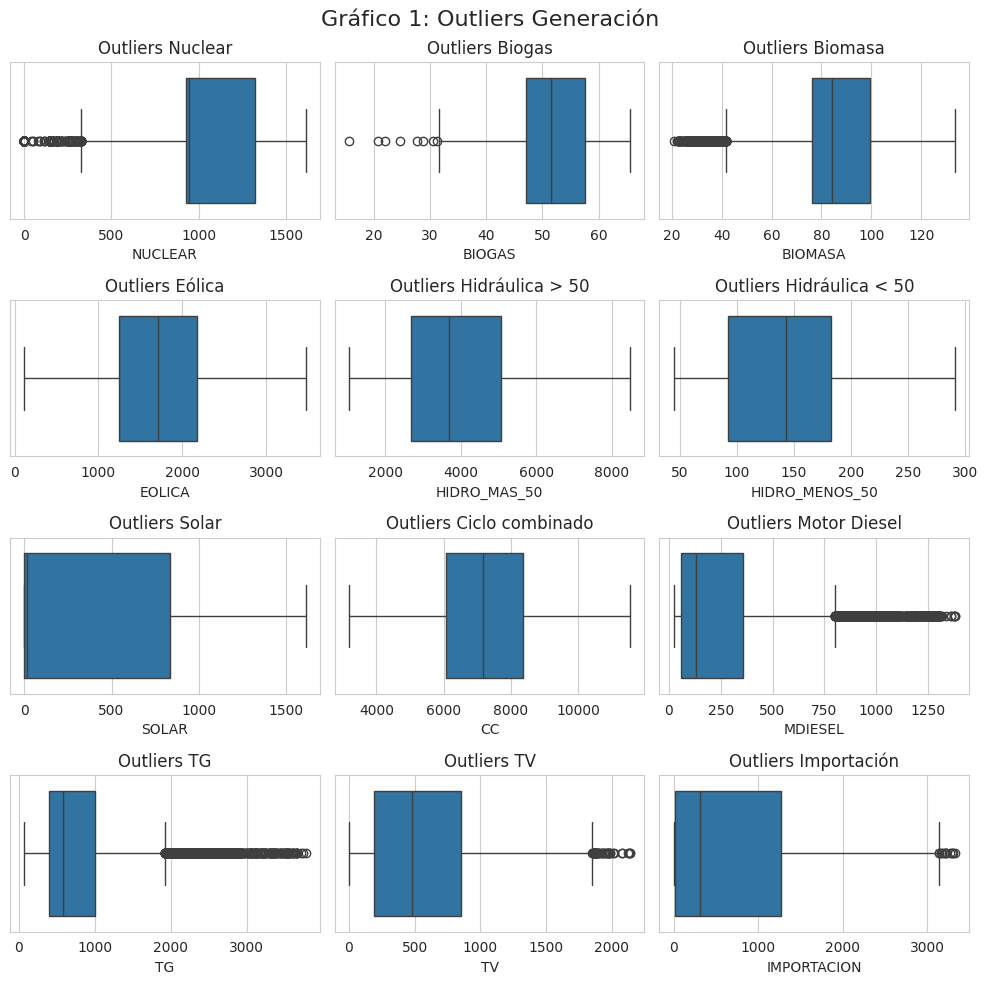

In [20]:
#Verificar outliers Generación - Boxplot y subplot
variables_generacion = ['NUCLEAR', 'BIOGAS', 'BIOMASA', 'EOLICA', 'HIDRO_MAS_50', 'HIDRO_MENOS_50', 'SOLAR', 'CC', 'MDIESEL', 'TG', 'TV', 'IMPORTACION']

# Se crea una figura con cuadrícula 4x3
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10)) # Axes[fila, columna], figsize(ancho, alto)

# Subplot 1
sns.boxplot(x=df_base['NUCLEAR'], ax=axes[0,0])
axes[0,0].set_title("Outliers Nuclear")

# Subplot 2
sns.boxplot(x=df_base['BIOGAS'], ax=axes[0,1])
axes[0,1].set_title("Outliers Biogas")

# Subplot 3
sns.boxplot(x=df_base['BIOMASA'], ax=axes[0,2])
axes[0,2].set_title("Outliers Biomasa")

# Subplot 4
sns.boxplot(x=df_base['EOLICA'], ax=axes[1,0])
axes[1,0].set_title("Outliers Eólica")

# Subplot 5
sns.boxplot(x=df_base['HIDRO_MAS_50'], ax=axes[1,1])
axes[1,1].set_title("Outliers Hidráulica > 50")

# Subplot 6
sns.boxplot(x=df_base['HIDRO_MENOS_50'], ax=axes[1,2])
axes[1,2].set_title("Outliers Hidráulica < 50")

# Subplot 7
sns.boxplot(x=df_base['SOLAR'], ax=axes[2,0])
axes[2,0].set_title("Outliers Solar")

# Subplot 8
sns.boxplot(x=df_base['CC'], ax=axes[2,1])
axes[2,1].set_title("Outliers Ciclo combinado")

# Subplot 9
sns.boxplot(x=df_base['MDIESEL'], ax=axes[2,2])
axes[2,2].set_title("Outliers Motor Diesel")


# Subplot 10
sns.boxplot(x=df_base['TG'], ax=axes[3,0])
axes[3,0].set_title("Outliers TG")

# Subplot 11
sns.boxplot(x=df_base['TV'], ax=axes[3,1])
axes[3,1].set_title("Outliers TV")

# Subplot 12
sns.boxplot(x=df_base['IMPORTACION'], ax=axes[3,2])
axes[3,2].set_title("Outliers Importación")

# Añadir título general
fig.suptitle('Gráfico 1: Outliers Generación ', fontsize=16)
plt.tight_layout()
plt.show()


Se puede observar en el gráfico 2 que las fuentes de generación que tienen outliers como por ejemplo importación, Motor diesel son las fuentes utilizadas para las horas pico de demanda, por lo cual van a tener valores altos en poco tiempo

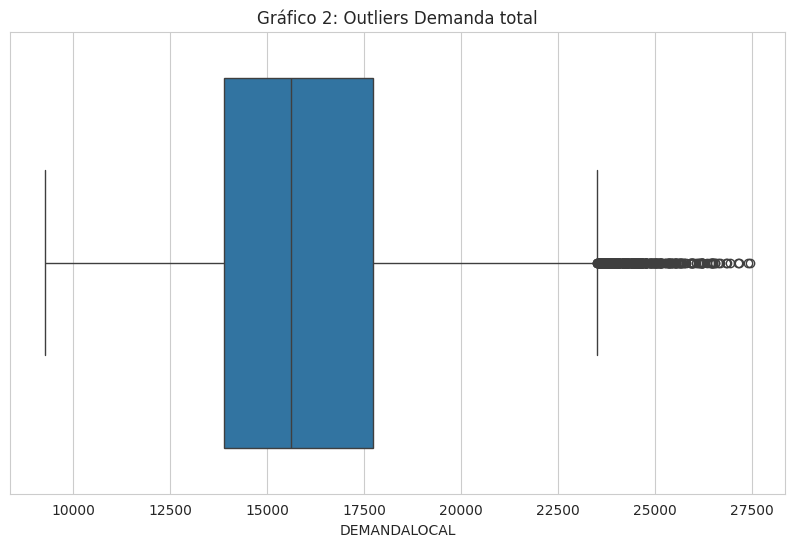

In [21]:
#Verificar outliers Demanda - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_base['DEMANDALOCAL'])
plt.title('Gráfico 2: Outliers Demanda total')
plt.show()


Para la demanda se puede observar valores altos fuera de rango, por lo cual se presumen valores por pico de consumo.

## 7.2 Visualización de df_base

In [22]:
print(df_base.dtypes)  # Verificar el tipo de datos

AÑO                         int64
TIPODIA                    object
FECHA              datetime64[ns]
HORA                        int64
NUCLEAR                   float64
BIOGAS                    float64
BIOMASA                   float64
EOLICA                    float64
HIDRO_MAS_50              float64
HIDRO_MENOS_50            float64
SOLAR                     float64
CC                        float64
MDIESEL                   float64
TG                        float64
TV                        float64
IMPORTACION               float64
GENERACIONTOTAL           float64
DEMANDALOCAL              float64
dtype: object


Al tener datos de varios años en df_base, se procede dividir los datos por categoria de fuente, a visualizar mediante barplot y viasualizaciones interactivas

In [23]:
variables_generacion = ['NUCLEAR', 'BIOGAS', 'BIOMASA', 'EOLICA', 'HIDRO_MAS_50', 'HIDRO_MENOS_50', 'SOLAR', 'CC', 'MDIESEL', 'TG', 'TV', 'IMPORTACION']

In [24]:
variables_renovables= ['BIOGAS', 'BIOMASA', 'EOLICA', 'HIDRO_MAS_50', 'HIDRO_MENOS_50', 'SOLAR']

In [25]:
variables_termicas= ['NUCLEAR', 'CC', 'MDIESEL', 'TG', 'TV']

In [26]:
df_generacion = df_base.copy()
df_generacion = df_base[variables_generacion].sum()
df_generacion.head()

,0
NUCLEAR,2.688119e+07
BIOGAS,1.365232e+06
BIOMASA,2.248616e+06
EOLICA,4.480439e+07
HIDRO_MAS_50,1.029422e+08


In [27]:
df_renovables = df_base.copy()
df_renovables = df_base[variables_renovables].sum()
df_renovables.head()

,0
BIOGAS,1.365232e+06
BIOMASA,2.248616e+06
EOLICA,4.480439e+07
HIDRO_MAS_50,1.029422e+08
HIDRO_MENOS_50,3.755477e+06


In [28]:
df_termicas = df_base.copy()
df_termicas = df_base[variables_termicas].sum()
df_termicas.head()

,0
NUCLEAR,2.688119e+07
CC,1.896867e+08
MDIESEL,5.956376e+06
TG,2.000709e+07
TV,1.450901e+07


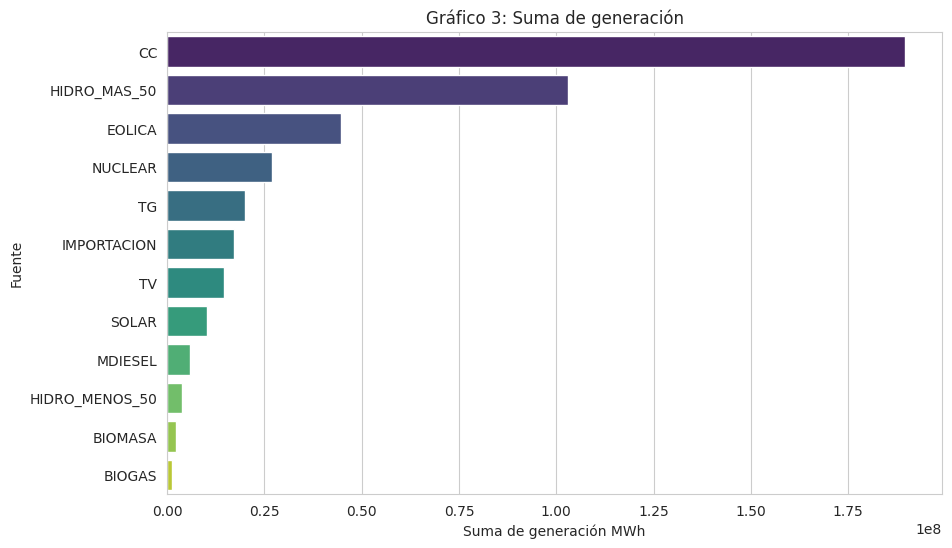

In [29]:
# Barplot: Suma de generación
plt.figure(figsize=(10, 6))
orden = df_generacion.sort_values(ascending=False).index
sns.barplot( x= df_generacion.values, y=df_generacion.index, ci='sd',order=orden, palette='viridis') # ci='sd' muestra desviación estándar
plt.title('Gráfico 3: Suma de generación')
plt.xlabel('Suma de generación MWh')
plt.ylabel('Fuente')
plt.show()

Se visualiza a lo largo del tiempo Ciclos Combinadoa con mayor generación acumulada

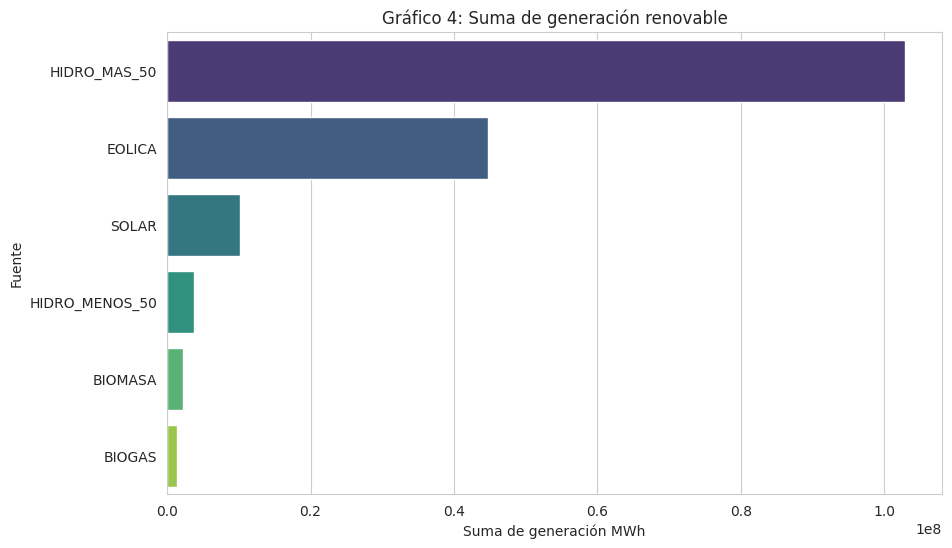

In [30]:
# Barplot: Suma de generación renovable
plt.figure(figsize=(10, 6))
orden = df_renovables.sort_values(ascending=False).index
sns.barplot( x= df_renovables.values, y=df_renovables.index, ci='sd',order=orden, palette='viridis') # ci='sd' muestra desviación estándar
plt.title('Gráfico 4: Suma de generación renovable')
plt.xlabel('Suma de generación MWh')
plt.ylabel('Fuente')
plt.show()

Se visualiza a lo largo del tiempo Hidroelectricas mayores a 50 MWh con mayor generación acumulada renovable

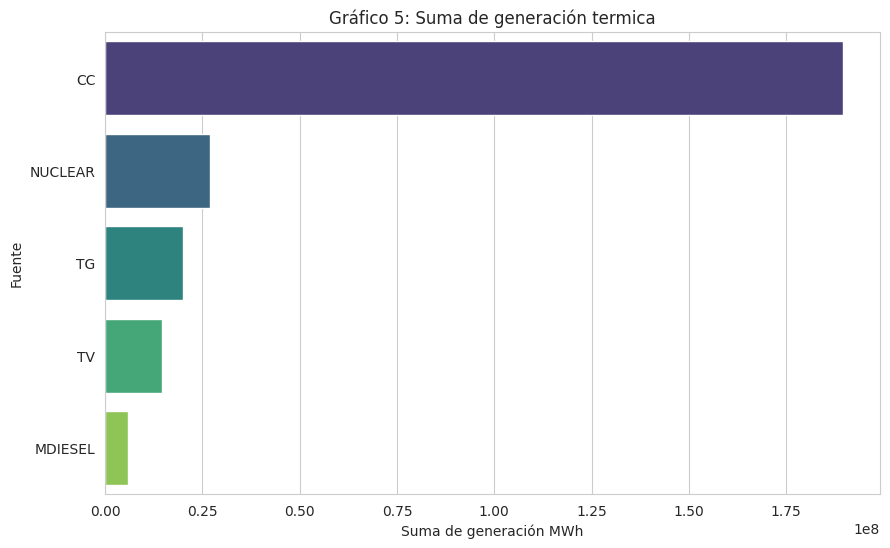

In [31]:
# Barplot: Suma de generación térmica
plt.figure(figsize=(10, 6))
orden = df_termicas.sort_values(ascending=False).index
sns.barplot( x= df_termicas.values, y=df_termicas.index, ci='sd',order=orden, palette='viridis') # ci='sd' muestra desviación estándar
plt.title('Gráfico 5: Suma de generación termica')
plt.xlabel('Suma de generación MWh')
plt.ylabel('Fuente')
plt.show()

Se visualiza a lo largo del tiempo Ciclos combinados con mayor generación acumulada térmica

## 7.3 Visualización de variables

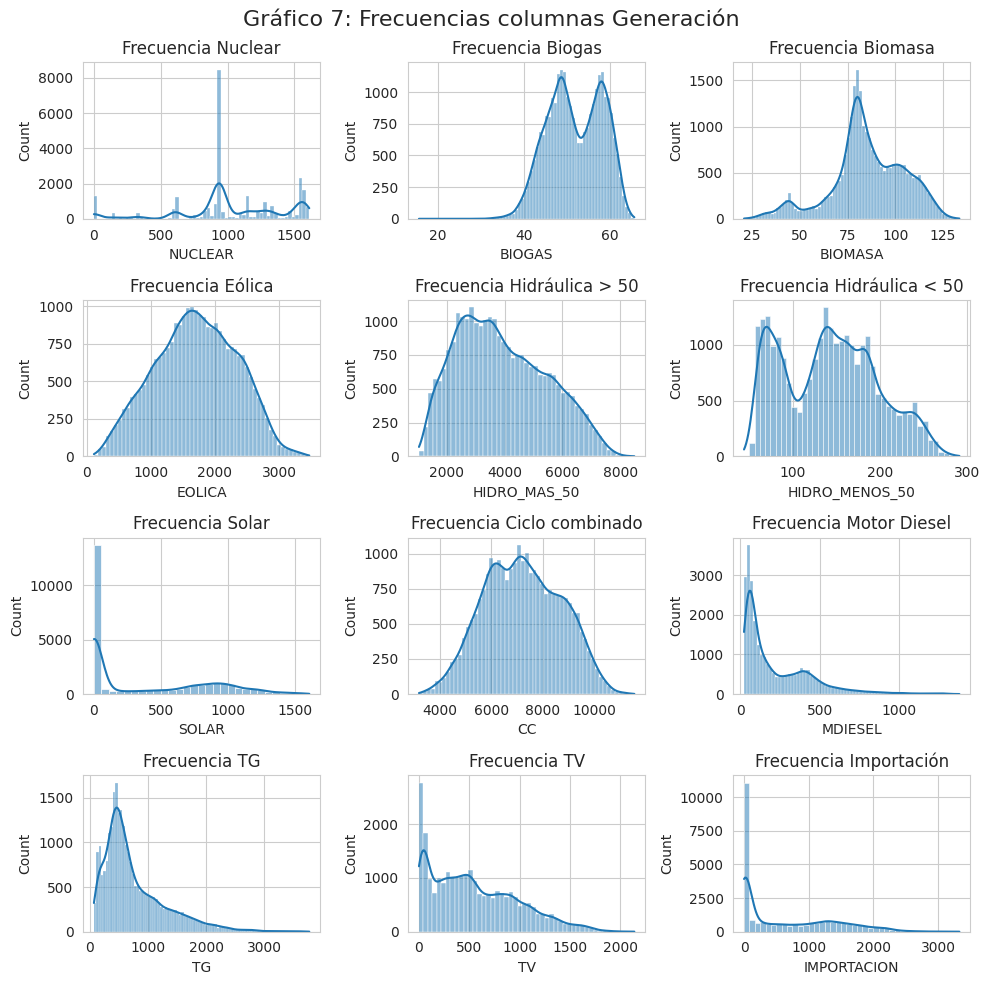

In [32]:
#Verificar distribución de Generación - Hisplot y subplot
# Se crea una figura con cuadrícula 4x3
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10)) # Axes[fila, columna], figsize(ancho, alto)

# Subplot 1
sns.histplot(df_base['NUCLEAR'], kde=True, ax=axes[0,0])
axes[0,0].set_title("Frecuencia Nuclear")
# Subplot 2
sns.histplot(df_base['BIOGAS'], kde=True, ax=axes[0,1])
axes[0,1].set_title("Frecuencia Biogas")
# Subplot 3
sns.histplot(df_base['BIOMASA'], kde=True, ax=axes[0,2])
axes[0,2].set_title("Frecuencia Biomasa")
# Subplot 4
sns.histplot(df_base['EOLICA'], kde=True, ax=axes[1,0])
axes[1,0].set_title("Frecuencia Eólica")
# Subplot 5
sns.histplot(df_base['HIDRO_MAS_50'], kde=True, ax=axes[1,1])
axes[1,1].set_title("Frecuencia Hidráulica > 50")
# Subplot 6
sns.histplot(df_base['HIDRO_MENOS_50'], kde=True, ax=axes[1,2])
axes[1,2].set_title("Frecuencia Hidráulica < 50")
# Subplot 7
sns.histplot(df_base['SOLAR'], kde=True, ax=axes[2,0])
axes[2,0].set_title("Frecuencia Solar")
# Subplot 8
sns.histplot(df_base['CC'], kde=True, ax=axes[2,1])
axes[2,1].set_title("Frecuencia Ciclo combinado")
# Subplot 9
sns.histplot(df_base['MDIESEL'], kde=True, ax=axes[2,2])
axes[2,2].set_title("Frecuencia Motor Diesel")
# Subplot 10
sns.histplot(df_base['TG'], kde=True, ax=axes[3,0])
axes[3,0].set_title("Frecuencia TG")
# Subplot 11
sns.histplot(df_base['TV'], kde=True, ax=axes[3,1])
axes[3,1].set_title("Frecuencia TV")
# Subplot 12
sns.histplot(df_base['IMPORTACION'], kde=True, ax=axes[3,2])
axes[3,2].set_title("Frecuencia Importación")

# Añadir título general
fig.suptitle('Gráfico 7: Frecuencias columnas Generación ', fontsize=16)
plt.tight_layout()
plt.show()


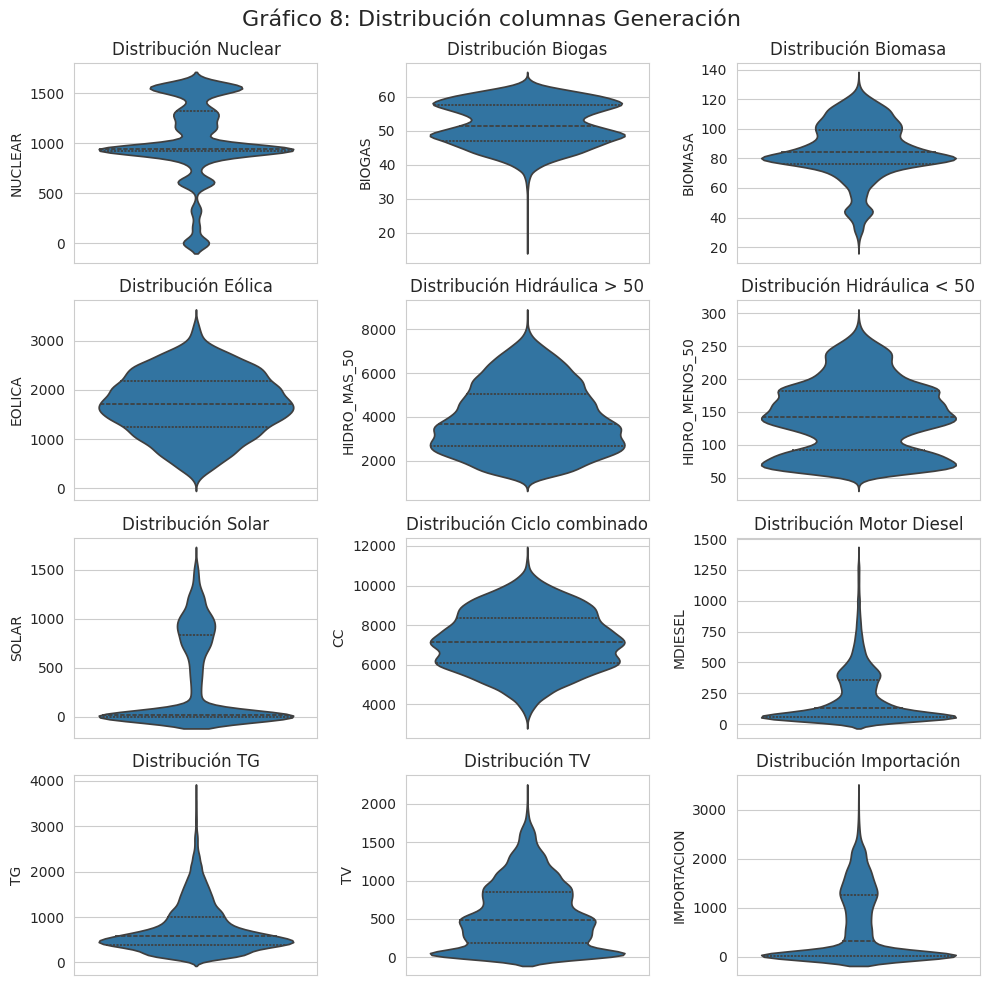

In [33]:
#Verificar distribución de Generación - Violinplot y subplot
# Se crea una figura con cuadrícula 4x3
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10)) # Axes[fila, columna], figsize(ancho, alto)

# Subplot 1
sns.violinplot(df_base['NUCLEAR'], ax=axes[0,0], inner='quartile') # inner='quartile' muestra los cuartiles dentro
axes[0,0].set_title("Distribución Nuclear")
# Subplot 2
sns.violinplot(df_base['BIOGAS'], ax=axes[0,1], inner='quartile')
axes[0,1].set_title("Distribución Biogas")
# Subplot 3
sns.violinplot(df_base['BIOMASA'], ax=axes[0,2], inner='quartile')
axes[0,2].set_title("Distribución Biomasa")
# Subplot 4
sns.violinplot(df_base['EOLICA'], ax=axes[1,0], inner='quartile')
axes[1,0].set_title("Distribución Eólica")
# Subplot 5
sns.violinplot(df_base['HIDRO_MAS_50'], ax=axes[1,1], inner='quartile')
axes[1,1].set_title("Distribución Hidráulica > 50")
# Subplot 6
sns.violinplot(df_base['HIDRO_MENOS_50'], ax=axes[1,2], inner='quartile')
axes[1,2].set_title("Distribución Hidráulica < 50")
# Subplot 7
sns.violinplot(df_base['SOLAR'], ax=axes[2,0], inner='quartile')
axes[2,0].set_title("Distribución Solar")
# Subplot 8
sns.violinplot(df_base['CC'], ax=axes[2,1], inner='quartile')
axes[2,1].set_title("Distribución Ciclo combinado")
# Subplot 9
sns.violinplot(df_base['MDIESEL'], ax=axes[2,2], inner='quartile')
axes[2,2].set_title("Distribución Motor Diesel")
# Subplot 10
sns.violinplot(df_base['TG'], ax=axes[3,0], inner='quartile')
axes[3,0].set_title("Distribución TG")
# Subplot 11
sns.violinplot(df_base['TV'], ax=axes[3,1], inner='quartile')
axes[3,1].set_title("Distribución TV")
# Subplot 12
sns.violinplot(df_base['IMPORTACION'], ax=axes[3,2], inner='quartile')
axes[3,2].set_title("Distribución Importación")

# Añadir título general
fig.suptitle('Gráfico 8: Distribución columnas Generación ', fontsize=16)
plt.tight_layout()
plt.show()




### 7.3.1 Generacion y Demanda total

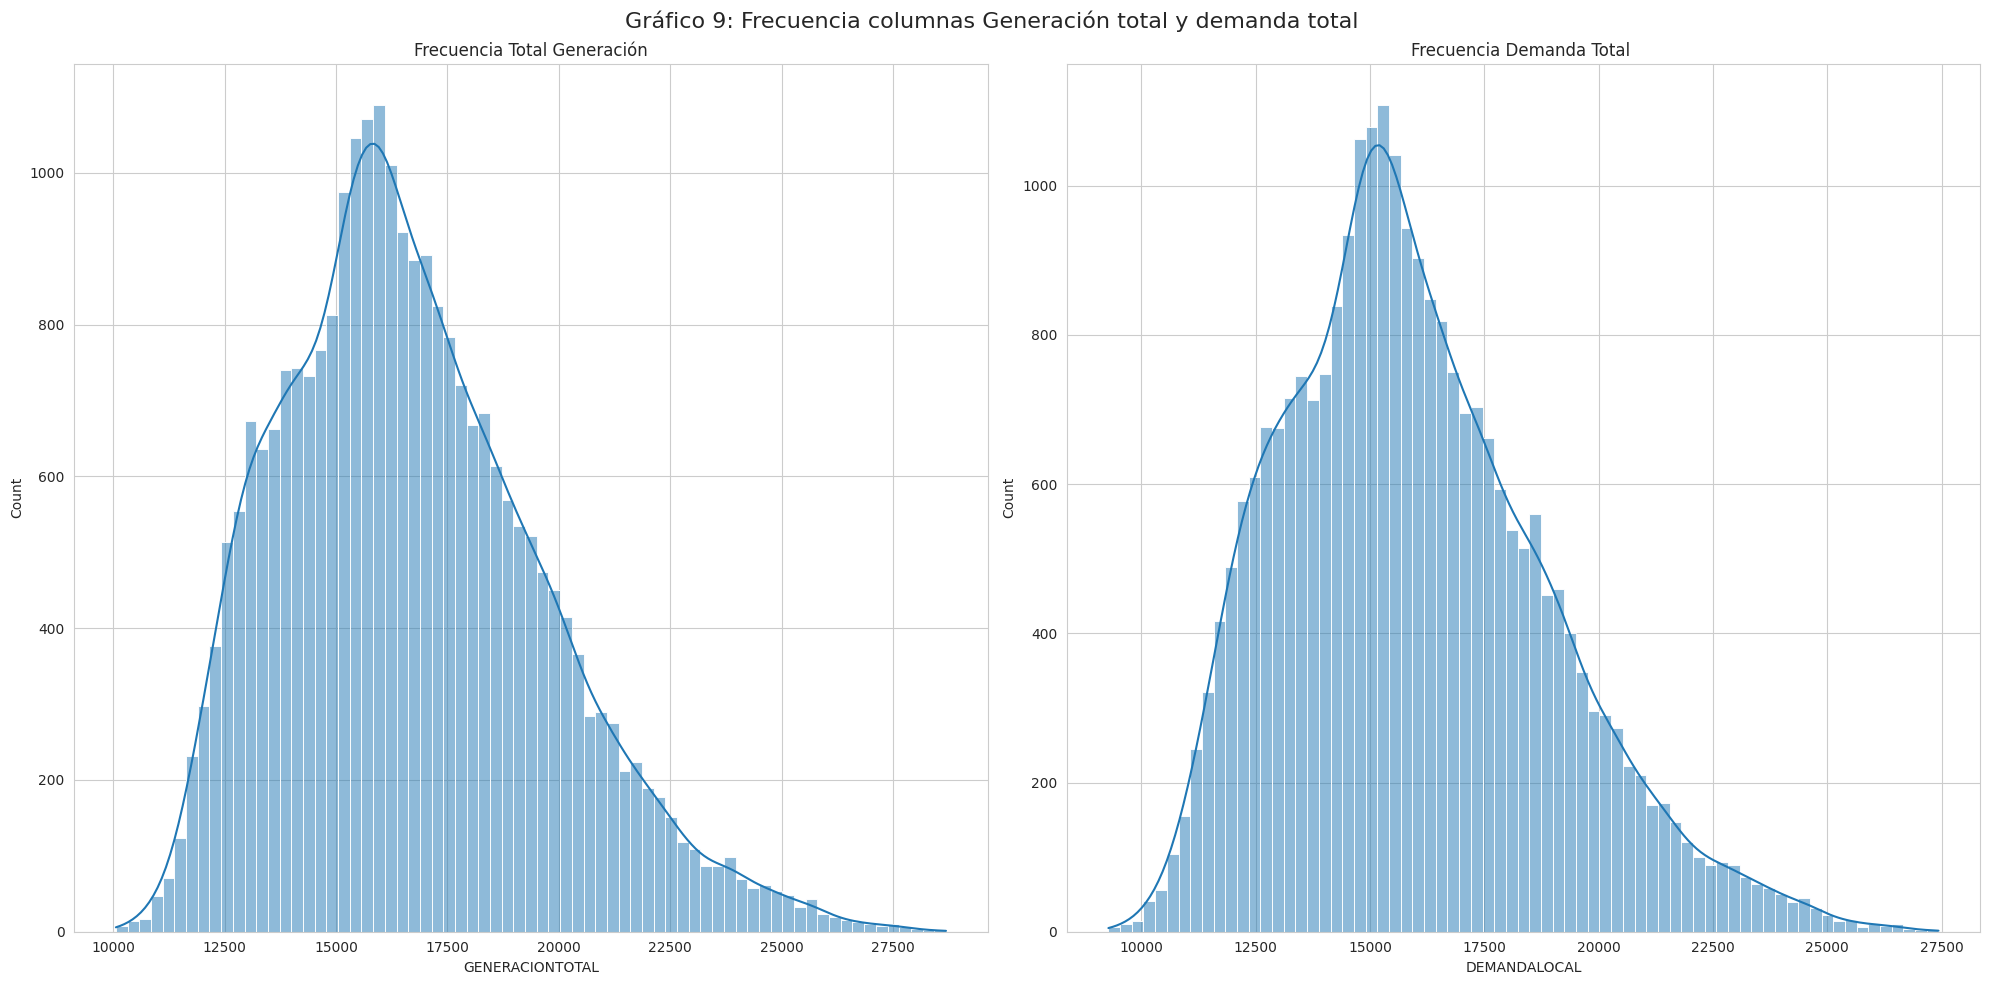

In [34]:
#Verificar Frecuencia de Generación y Demanda- Hisplot y subplot
# Se crea una figura con cuadrícula 2x2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)) # Axes[fila, columna], figsize(ancho, alto)

# Subplot 1
sns.histplot(df_base['GENERACIONTOTAL'], kde=True, ax=axes[0])
axes[0].set_title("Frecuencia Total Generación")
# Subplot 2
sns.histplot(df_base['DEMANDALOCAL'], kde=True, ax=axes[1])
axes[1].set_title("Frecuencia Demanda Total ")

# Añadir título general
fig.suptitle('Gráfico 9: Frecuencia columnas Generación total y demanda total ', fontsize=16)
plt.tight_layout()
plt.show()



Se verifica que la distribución de las variables generación y demanda total tienen asimetria positiva, teniendo algunos valores pico y la mayoria en valores mas bajos que los picos. También se observa que coinciden en su distribución.

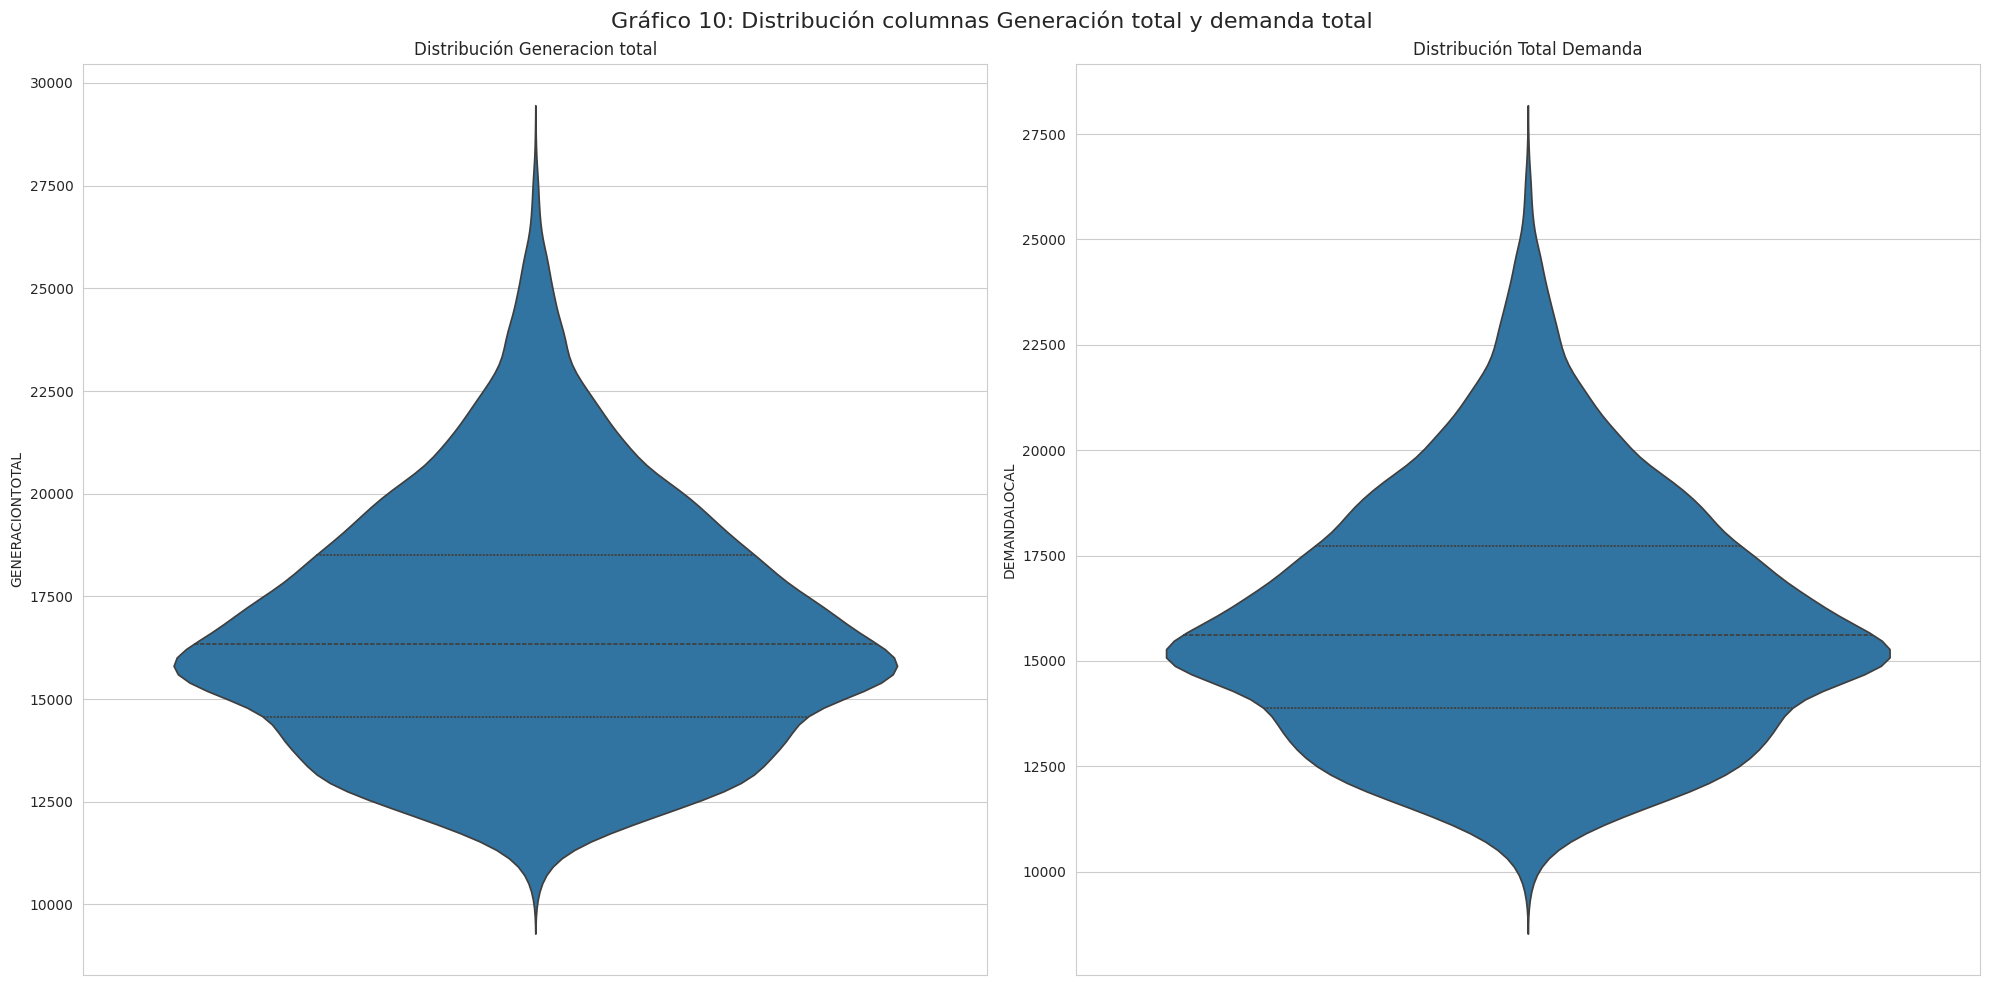

In [35]:
#Verificar distribución de Generación y demanda - Violinplot y subplot
# Se crea una figura con cuadrícula 1x2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)) # Axes[fila, columna], figsize(ancho, alto)

# Subplot 1
sns.violinplot(df_base['GENERACIONTOTAL'], ax=axes[0], inner='quartile') # inner='quartile' muestra los cuartiles dentro
axes[0].set_title("Distribución Generacion total")
# Subplot 2
sns.violinplot(df_base['DEMANDALOCAL'], ax=axes[1], inner='quartile')
axes[1].set_title("Distribución Total Demanda")

# Añadir título general
fig.suptitle('Gráfico 10: Distribución columnas Generación total y demanda total ', fontsize=16)
plt.tight_layout()
plt.show()



En el gráfico 10 se observa que la distribución de la generación total y la demanda total es similar siendo la media de generación un poco mayor

In [36]:
print("Media Generacion Total:" , df_base['GENERACIONTOTAL'].mean())
print("Media Demanda Total:" , df_base['DEMANDALOCAL'].mean())

Media Generacion Total: 16708.096895567218
Media Demanda Total: 15962.522354014598


In [37]:
print("Mediana Generacion Total:" , df_base['GENERACIONTOTAL'].median())
print("Mediana Demanda Total:" , df_base['DEMANDALOCAL'].median())

Mediana Generacion Total: 16342.899000000001
Mediana Demanda Total: 15617.5


### 7.3.2 Importacion

In [38]:
asimetria_df_base = df_base['IMPORTACION'].skew()
curtosis_df_base = df_base['IMPORTACION'].kurt() #grado de apuntamiento o achatamiento de la distribución de frecuencia.
print("Asimetría:")
print(asimetria_df_base)
print("\nCurtosis:")
print(curtosis_df_base)

Asimetría:
0.7860233449709062

Curtosis:
-0.6139149576739742


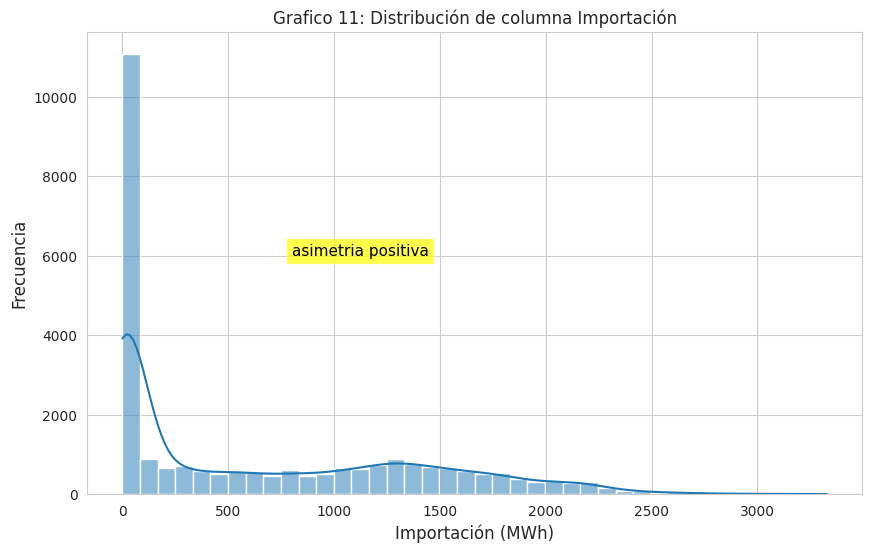

In [39]:
sns.histplot(df_base['IMPORTACION'], kde=True)
plt.title('Grafico 11: Distribución de columna Importación')
plt.xlabel("Importación (MWh)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Insight anotado
plt.text(800,6000, "asimetria positiva",
         fontsize=11, color="black", bbox=dict(facecolor="yellow", alpha=0.7))
plt.show()

Se verifica que la distribución de la variable Importación tiene asimetria positiva, la mayoria de los valores estan concentrados en muy pocos MWh, esto indica que la importación de energía es excepcional en algunos casos con valores altos

##7.4 Correlaciones entre variables

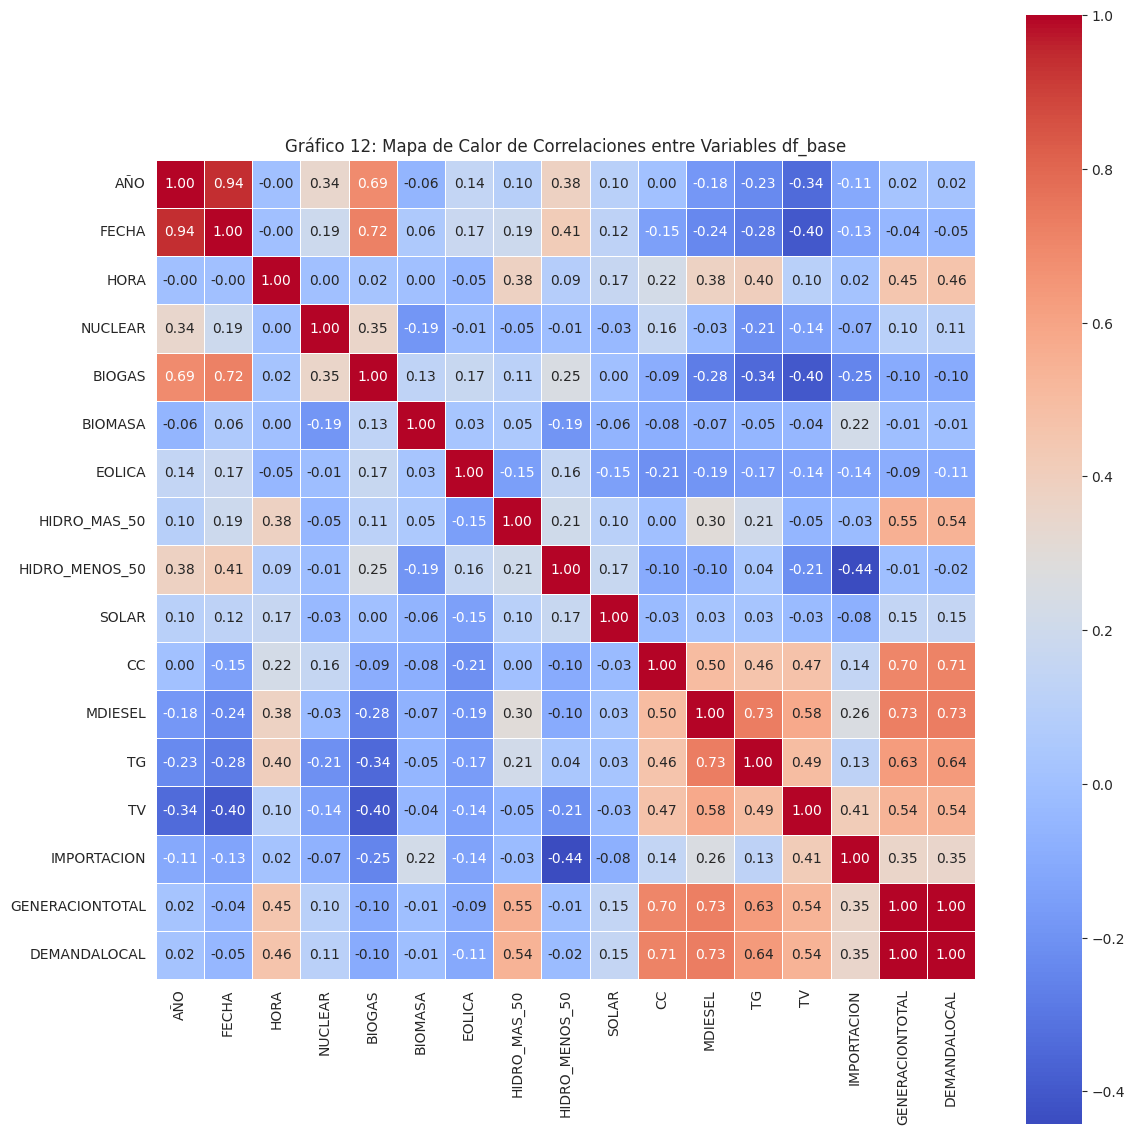

In [40]:
# Matriz de correlación-heatmap de seaborn
variables_numericas = ['AÑO','FECHA','HORA','NUCLEAR', 'BIOGAS', 'BIOMASA', 'EOLICA', 'HIDRO_MAS_50', 'HIDRO_MENOS_50', 'SOLAR', 'CC', 'MDIESEL', 'TG', 'TV', 'IMPORTACION', 'GENERACIONTOTAL', 'DEMANDALOCAL']
correlaciones = df_base[variables_numericas].corr()
# Crear el heatmap
plt.figure(figsize=(12, 12)) #Tamaño de gráfico
sns.heatmap(correlaciones,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm',
            linewidths=0.5)
plt.title('Gráfico 12: Mapa de Calor de Correlaciones entre Variables df_base')
plt.tight_layout()
plt.show()

En el grafico 12 se puede observar los valores en rojo con correlacion positiva , es decir, si una variable aumenta la otra tambien aumenta.
 Por ejemplo generación y demanda total, año y fecha.
Para Ciclos combinados(CC) y Motor diesel la correlacion es positiva respecto a la demanda y generación, por lo cual se puede inferir que al aumentar la demanda aumenta la generacion de esas fuentes.

## 7.5 Visualización de un año (df_2024)

Para poder entender con mayor calridad la estacionalidad de la demanda, se filtra el df_base para 2024

In [41]:
df_base

,AÑO,TIPODIA,FECHA,HORA,NUCLEAR,BIOGAS,BIOMASA,EOLICA,HIDRO_MAS_50,HIDRO_MENOS_50,SOLAR,CC,MDIESEL,TG,TV,IMPORTACION,GENERACIONTOTAL,DEMANDALOCAL
0,2022,No Hábil,2022-01-01,1,1357.060,48.098,67.429,1649.507,1678.081,110.497,0.000,8884.915,264.439,1215.024,1100.361,278.204,16653.615,15894.0
1,2022,No Hábil,2022-01-01,2,1360.842,47.729,50.870,1529.287,1744.359,111.797,0.000,9269.344,238.832,1123.293,1100.440,232.120,16808.913,15967.0
2,2022,No Hábil,2022-01-01,3,1359.371,47.745,45.193,1490.881,1570.168,110.453,0.000,9711.728,237.449,1113.151,1091.554,222.778,17000.471,16246.0
3,2022,No Hábil,2022-01-01,4,1357.517,46.755,45.664,1848.192,1558.943,110.664,0.000,9598.543,235.638,1120.335,1089.965,276.418,17288.634,16315.0
4,2022,No Hábil,2022-01-01,5,1358.948,46.883,46.031,2270.724,1574.759,111.008,0.000,9040.523,238.270,1044.805,1093.251,291.968,17117.170,16105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2024,Hábil,2024-12-31,20,1139.181,54.986,86.832,2259.766,4226.993,153.553,288.373,8792.182,172.199,761.922,373.344,0.028,18309.359,17575.0
26300,2024,Hábil,2024-12-31,21,1139.984,55.428,82.761,2255.846,4528.189,170.953,20.168,8982.498,176.392,899.281,322.530,0.028,18634.058,17881.0
26301,2024,Hábil,2024-12-31,22,1140.962,55.535,83.628,1972.647,4107.739,165.030,0.000,9045.500,181.909,883.725,312.528,0.022,17949.225,17374.0
26302,2024,Hábil,2024-12-31,23,1139.501,55.642,81.527,1935.492,3314.324,176.739,0.000,8737.521,130.123,549.258,215.099,0.022,16335.248,15862.0


In [42]:
#Se filtra df_base para 2024
df_2024=df_base.copy()
df_2024 = df_base[df_base['AÑO'] == 2024]

df_2024.shape #tamaño de dataframe

(8784, 18)

In [43]:
df_2024

,AÑO,TIPODIA,FECHA,HORA,NUCLEAR,BIOGAS,BIOMASA,EOLICA,HIDRO_MAS_50,HIDRO_MENOS_50,SOLAR,CC,MDIESEL,TG,TV,IMPORTACION,GENERACIONTOTAL,DEMANDALOCAL
17520,2024,No Hábil,2024-01-01,1,1553.168,51.827,37.379,1315.148,4665.665,139.757,0.000,5260.473,44.804,203.033,8.860,12.672,13292.786,12781.0
17521,2024,No Hábil,2024-01-01,2,1552.417,50.786,37.878,1233.373,4816.610,137.700,0.000,5180.658,42.485,146.784,8.985,12.594,13220.270,12725.0
17522,2024,No Hábil,2024-01-01,3,1552.489,50.649,37.791,1320.279,4695.603,137.704,0.000,5215.749,42.366,146.440,8.931,12.237,13220.238,12660.0
17523,2024,No Hábil,2024-01-01,4,1552.198,49.140,37.892,1071.560,4842.162,137.792,0.000,5231.905,42.999,148.208,8.951,11.810,13134.617,12433.0
17524,2024,No Hábil,2024-01-01,5,1553.620,49.278,37.684,974.324,4823.720,137.875,0.000,5237.212,39.124,151.899,8.920,11.414,13025.070,12201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2024,Hábil,2024-12-31,20,1139.181,54.986,86.832,2259.766,4226.993,153.553,288.373,8792.182,172.199,761.922,373.344,0.028,18309.359,17575.0
26300,2024,Hábil,2024-12-31,21,1139.984,55.428,82.761,2255.846,4528.189,170.953,20.168,8982.498,176.392,899.281,322.530,0.028,18634.058,17881.0
26301,2024,Hábil,2024-12-31,22,1140.962,55.535,83.628,1972.647,4107.739,165.030,0.000,9045.500,181.909,883.725,312.528,0.022,17949.225,17374.0
26302,2024,Hábil,2024-12-31,23,1139.501,55.642,81.527,1935.492,3314.324,176.739,0.000,8737.521,130.123,549.258,215.099,0.022,16335.248,15862.0


In [44]:
fig = go.Figure() # Se crea figura

#Fuentes Generacion total vs demanda total

fig.add_trace(go.Scatter(x=df_2024['FECHA'], y=df_2024['GENERACIONTOTAL'], mode='lines', name='GENERACIONTOTAL'))
fig.add_trace(go.Scatter(x=df_2024['FECHA'], y=df_2024['DEMANDALOCAL'], mode='lines', name='DEMANDALOCAL'))


#Diseño

fig.update_layout(
    title='Gráfico 13: Generación total vs demanda total para 2024 ',
    xaxis_title='Fecha',
    yaxis_title='MWh',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


Se puede observar en el gráfico 13 que la generación es mayor a la demanda y cubre los picos de consumo. También se refleja estacionalidad con picos de consumo en verano alrededor de los 30 GW (Enero, Febrero).

## 7.6 Visualización de un dia (df_2024_1_31)

Para poder comprender con mayor calridad el despacho de energía y como cubre la demanda el df_2024 para un dia de verano 31/1/2024

In [45]:
df_2024_1_31=df_2024.copy()
df_2024_1_31 = df_2024[df_2024['FECHA'] == '2024-01-31']
df_2024_1_31

,AÑO,TIPODIA,FECHA,HORA,NUCLEAR,BIOGAS,BIOMASA,EOLICA,HIDRO_MAS_50,HIDRO_MENOS_50,SOLAR,CC,MDIESEL,TG,TV,IMPORTACION,GENERACIONTOTAL,DEMANDALOCAL
18240,2024,Hábil,2024-01-31,1,1221.644,52.029,79.587,1710.980,5701.061,213.284,0.000,9978.822,338.289,870.304,982.246,1397.076,22545.322,21752.0
18241,2024,Hábil,2024-01-31,2,1222.891,51.970,78.678,1837.797,5047.260,206.911,0.000,9988.368,360.662,781.961,935.040,729.417,21240.955,20564.0
18242,2024,Hábil,2024-01-31,3,1223.073,52.643,78.460,1817.370,4763.422,204.606,0.000,10016.811,231.665,760.190,912.654,226.881,20287.775,19628.0
18243,2024,Hábil,2024-01-31,4,1222.742,52.427,77.655,1967.187,4508.529,204.575,0.000,9677.133,85.425,727.070,890.519,354.924,19768.186,18929.0
18244,2024,Hábil,2024-01-31,5,1223.454,52.678,78.510,1958.107,4070.555,205.220,0.000,9679.386,59.289,596.998,888.283,447.092,19259.572,18402.0
18245,2024,Hábil,2024-01-31,6,1223.482,52.584,78.145,2018.351,4016.909,200.447,0.000,9707.682,36.818,339.896,887.004,503.691,19065.009,18019.0
18246,2024,Hábil,2024-01-31,7,1225.691,52.692,74.358,1862.691,4016.593,200.790,0.001,9395.036,37.484,334.410,881.300,516.731,18597.777,17666.0
18247,2024,Hábil,2024-01-31,8,1226.575,50.520,75.394,1652.230,4418.330,208.775,102.198,9313.879,41.139,410.414,884.596,343.648,18727.698,17841.0
18248,2024,Hábil,2024-01-31,9,1227.047,51.201,75.965,1544.046,4703.968,209.584,741.824,9224.327,52.219,619.075,884.998,834.540,20168.794,19305.0
18249,2024,Hábil,2024-01-31,10,1227.572,50.612,73.652,1845.189,4654.688,209.033,1128.316,9260.726,159.363,704.015,880.388,1425.419,21618.973,20726.0


In [46]:
fig = go.Figure() # Se crea figura

#Fuentes de generación

fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['NUCLEAR'], mode='lines', name='NUCLEAR'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['BIOGAS'], mode='lines', name='BIOGAS'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['BIOMASA'], mode='lines', name='BIOMASA'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['EOLICA'], mode='lines', name='EOLICA'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['HIDRO_MAS_50'], mode='lines', name='HIDRO_MAS_50'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['HIDRO_MENOS_50'], mode='lines', name='HIDRO_MENOS_50'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['SOLAR'], mode='lines', name='SOLAR'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['CC'], mode='lines', name='CC'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['MDIESEL'], mode='lines', name='MDIESEL'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['TG'], mode='lines', name='TG'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['TV'], mode='lines', name='TV'))
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['IMPORTACION'], mode='lines+markers', line=dict(color='grey', width=2),marker=dict(color='grey', size=6), name='IMPORTACION'))

#Demanda total
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['DEMANDALOCAL'], mode='lines+markers', line=dict(color='black', width=2),marker=dict(color='black', size=6), name='DEMANDALOCAL'))

#Diseño

fig.update_layout(
    title='Gráfico 14: Evolución de las fuentes de generación para 31/1/2024 por hora vs demanda',
    xaxis_title='Hora',
    yaxis_title='MWh',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


En el gráfico 15 se puede observar que la fuente Ciclos combinados es la fuente con mayor generación seguida por la generación hidraulica de base la cual se debe despachar y la nuclear donde se observa que es continua en el tiempo. El grafico tambien indica que no todas las fuentes son de generación continua, depende de su disponibilidad.

## 7.7 Visualización Demanda vs Oferta para un dia

In [47]:
fig = go.Figure() # Se crea figura

#Fuentes Generacion total vs demanda total

fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['GENERACIONTOTAL'], mode='lines', name='GENERACIONTOTAL'))
fig.add_trace(go.Scatter(x=df_2024['HORA'], y=df_2024_1_31['DEMANDALOCAL'], mode='lines', name='DEMANDALOCAL'))


#Diseño

fig.update_layout(
    title='Gráfico 15: Generación total vs demanda total para 31/1/2024 ',
    xaxis_title='hora',
    yaxis_title='MWh',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

En el grafico 15 se puede visualizar una curva tipica horaria de verano con el pico de demanda y generación de 14 a 18 h. Tambien se visualiza que para este dia la curva de generacion cubre la demanda total.

## 7.8 Visualización Fuentes para un dia

In [49]:
# Se crea grafico de barras superpuestas por fuente con px.bar
fig = go.Figure() # Se crea figura
fig = px.bar(df_2024_1_31, x='HORA', y=['NUCLEAR', 'BIOGAS', 'BIOMASA', 'EOLICA', 'HIDRO_MAS_50', 'HIDRO_MENOS_50', 'SOLAR', 'CC', 'MDIESEL', 'TG', 'TV', 'IMPORTACION'], barmode='stack')

#Demanda total
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['DEMANDALOCAL'], mode='lines+markers', line=dict(color='black', width=2),marker=dict(color='black', size=6), name='DEMANDALOCAL'))



#Diseño

fig.update_layout(
    title='Gráfico 16: Distribución de fuentes para 31/1/2024 vs demanda',
    xaxis_title='hora',
    yaxis_title='MWh',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

En el grafico 16 se puede visualizar que parte de la curva de demanda cubre cada fuente, en el mismo se refleja lo cubierto por importación, fuentes base y pico

# 8. Hipotesis




## 8.1  Para una demanda local, dado un dia y hora la combinación de fuentes de generación no es aleatoria, sigue un patron en base a la disponibilidad de las mismas y sus costos.

In [51]:
# Se crea grafico de barras superpuestas por fuente con px.bar
fig = go.Figure() # Se crea figura
fig = px.bar(df_2024_1_31, x='HORA', y=['NUCLEAR', 'BIOGAS', 'BIOMASA', 'EOLICA', 'HIDRO_MAS_50', 'HIDRO_MENOS_50', 'SOLAR', 'CC', 'MDIESEL', 'TG', 'TV', 'IMPORTACION'], barmode='stack')

#Demanda total
fig.add_trace(go.Scatter(x=df_2024_1_31['HORA'], y=df_2024_1_31['DEMANDALOCAL'], mode='lines+markers', line=dict(color='black', width=2),marker=dict(color='black', size=6), name='DEMANDALOCAL'))



#Diseño

fig.update_layout(
    title='Gráfico 16: Distribución de fuentes para 31/1/2024 vs demanda',
    xaxis_title='hora',
    yaxis_title='MWh',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

En el grafico 16 se observa que las fuentes nuclear,eolica y hidroelectrica mayor a 50 MW son base, nuclear debido a su estabilidad, eolica y hidroelectrica debido a su prioridad de despacho y disponibilidad, generando mas energia al principio y fin del dia en el caso de la eólica.
Para suplir picos de demanda se utilizo energía termica (TV,TG y Motor diesel debido a su capacidad de rápida respuesta y flexibilidad) e importación.


## 8.2 Para un dia, se pueden detectar fuentes de generación base a lo largo de las horas (por ejemplo nuclear) y fuentes de generación de pico que generan energía en horas pico de consumo (por ejemplo térmicas).



Al observar el gráfico 16 se puede inferir energía de base y pico

## 8.3 La demanda es altamente horaria.

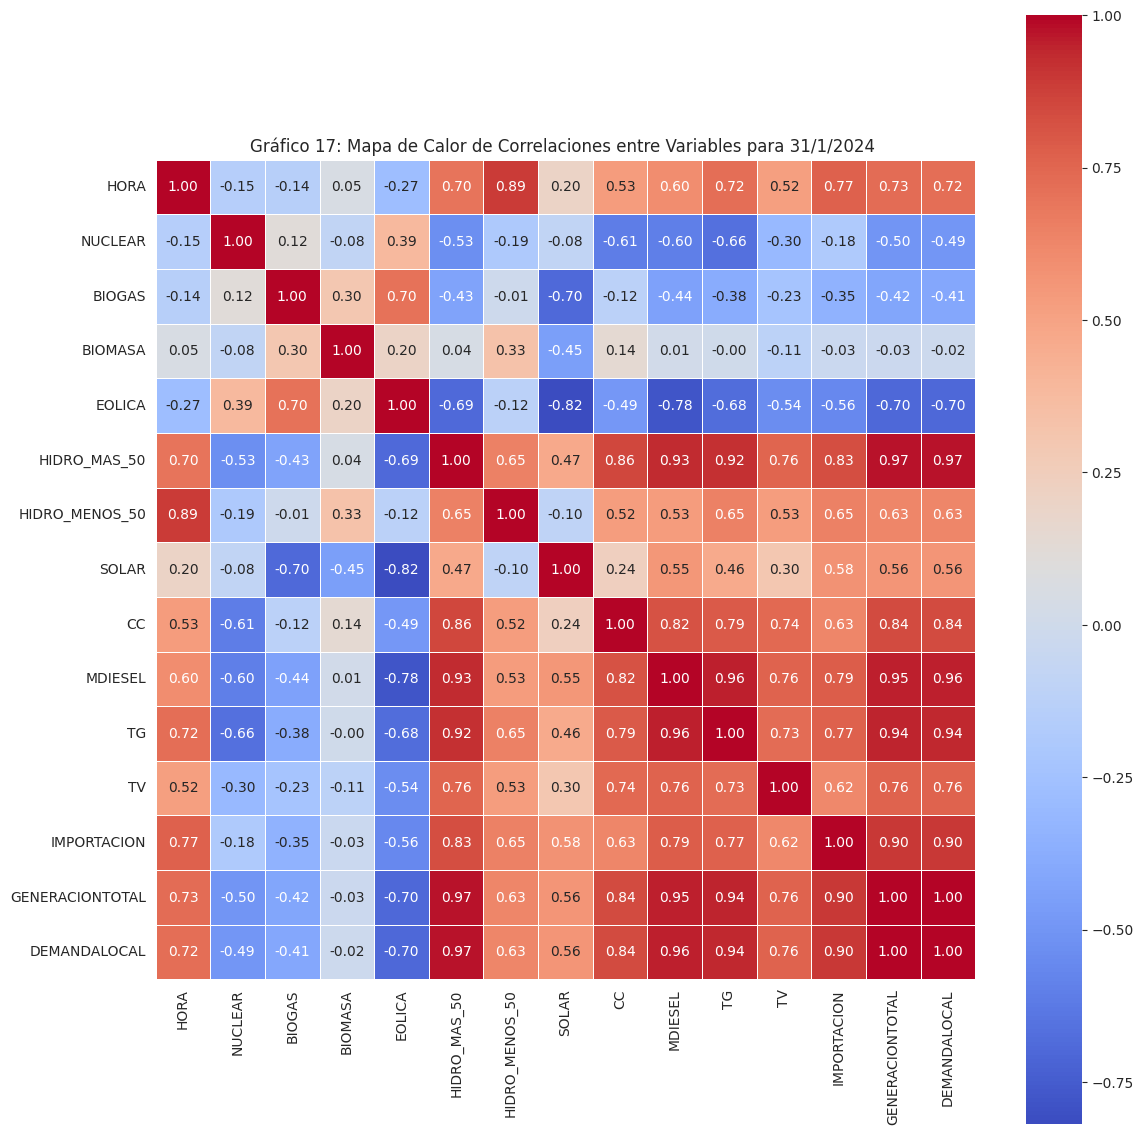

In [54]:
# Matriz de correlación-heatmap de seaborn
variables_numericas = ['HORA','NUCLEAR', 'BIOGAS', 'BIOMASA', 'EOLICA', 'HIDRO_MAS_50', 'HIDRO_MENOS_50', 'SOLAR', 'CC', 'MDIESEL', 'TG', 'TV', 'IMPORTACION', 'GENERACIONTOTAL', 'DEMANDALOCAL']
correlaciones = df_2024_1_31[variables_numericas].corr()
# Crear el heatmap
plt.figure(figsize=(12, 12)) #Tamaño de gráfico
sns.heatmap(correlaciones,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm',
            linewidths=0.5)
plt.title('Gráfico 17: Mapa de Calor de Correlaciones entre Variables para 31/1/2024 ')
plt.tight_layout()
plt.show()

Para 31/1/2024 para las columnas DEMANDALOCAL y HORA se puede visualizar un coeficiente de correlacion de 0,72

## 8.4 Cuando hay falta de oferta se utiliza la importación generalmente en horas pico

Al observar el gráfico 16 se puede visualizar la utilización de energía de importación en varias horas a lo largo de un dia.